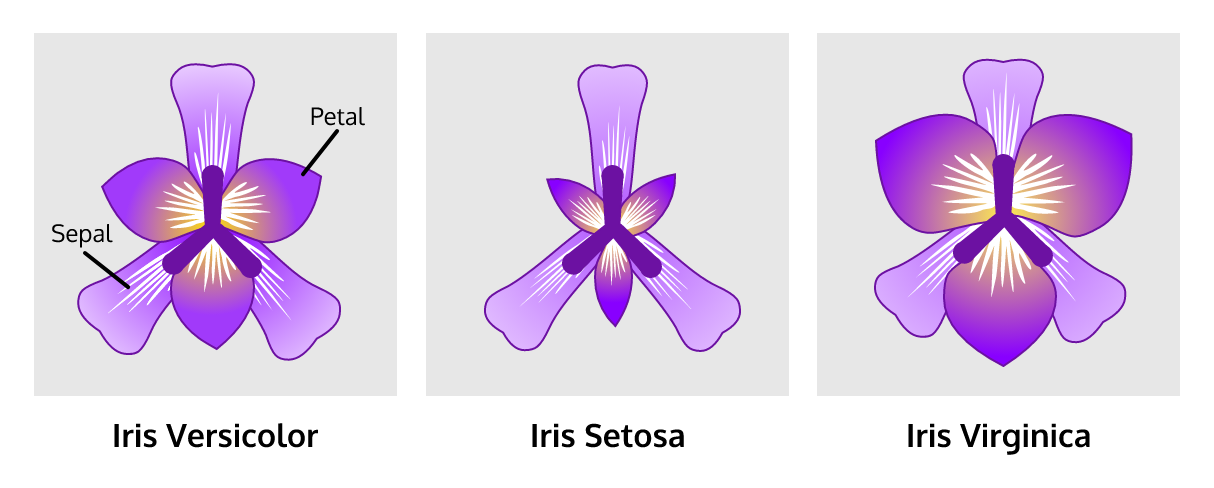

# Import Libraries

In [1]:
# The Python package for scientific computing
import numpy as np

# A module for handling data
import pandas as pd

# Python's plotting module. 
# We improve the graphics by overriding the default matplotlib styles with those of seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# A function that would plot for us the decision regions of a problem
from mlxtend.plotting import plot_decision_regions

# A method used to split the dataset into training and testing
from sklearn.model_selection import train_test_split

# The iris dataset from the sklearn library
from sklearn.datasets import load_iris

# The Decision Tree classifier from the sklearn library
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Metrics that would allow us to evaluate our model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, roc_curve, auc, roc_auc_score

# Load The Data

In [2]:
# We can load the iris dataset straight from sklearn
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
print('Shape of the inputs:', X.shape,'\n')
print('Shape of the target:', y.shape,'\n')

Shape of the inputs: (150, 4) 

Shape of the target: (150,) 



## Data Visualization

In [4]:
#create a data frame for target column for display the distribution
df = pd.DataFrame(data = y, columns = ['Target'])

In [5]:
def dist_plot(X):
  plt.figure(figsize=(12,7))
  sns.set(palette="muted", color_codes=True)
  first_15 = sns.barplot(x=df[X].value_counts().index, y=df[X].value_counts().values)
  plt.xticks(rotation='0', fontsize=14, fontweight='bold')
  plt.xlabel(X, fontsize=16, fontweight='bold')
  plt.yticks(rotation='0', fontsize=14, fontweight='bold')
  plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')

  for patch in first_15.patches:
              first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                  ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5),
                  textcoords='offset points')
  # plt.grid()
  plt.show()

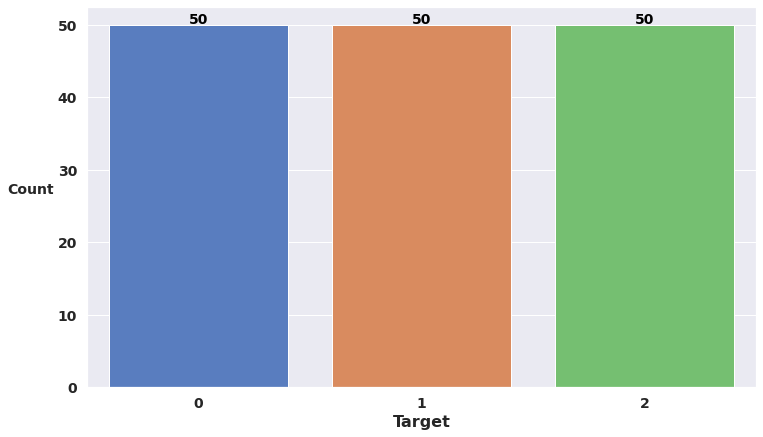

In [6]:
dist_plot("Target")

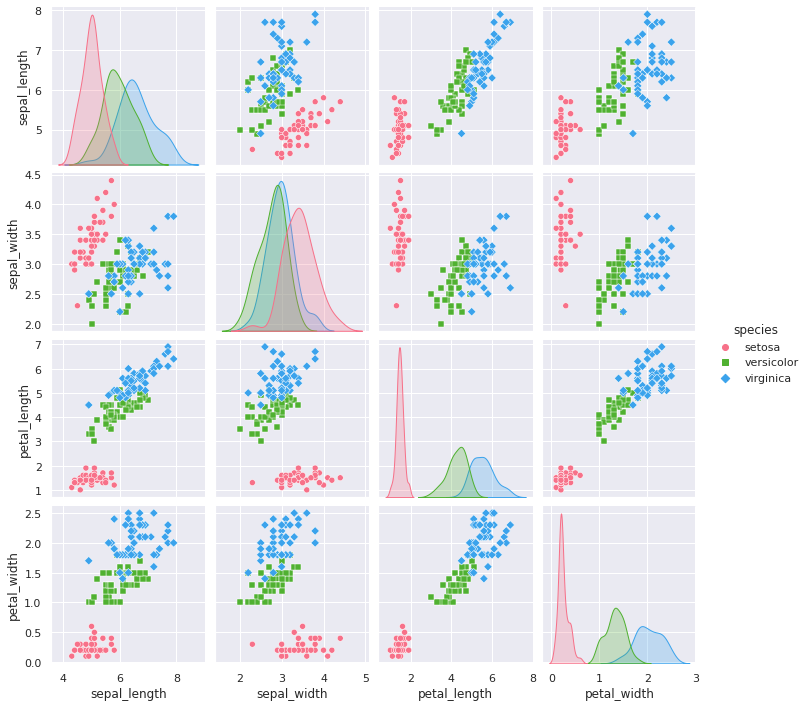

In [7]:
#display the pairwise plot
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue="species", palette="husl", markers=["o", "s", "D"])

plt.show()

# Train test split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=365, stratify = y)

# The Decision Tree Model

## Creating and Training the model

In [9]:
# Defining the tree classifier
clf = DecisionTreeClassifier()

In [10]:
# Training/creating the decision tree
clf = clf.fit(x_train, y_train)

In [11]:
#test the accuracy of model on training set
print('D_Tree Train Score is : ' , clf.score(x_train, y_train))

D_Tree Train Score is :  1.0


## Plot The Tree

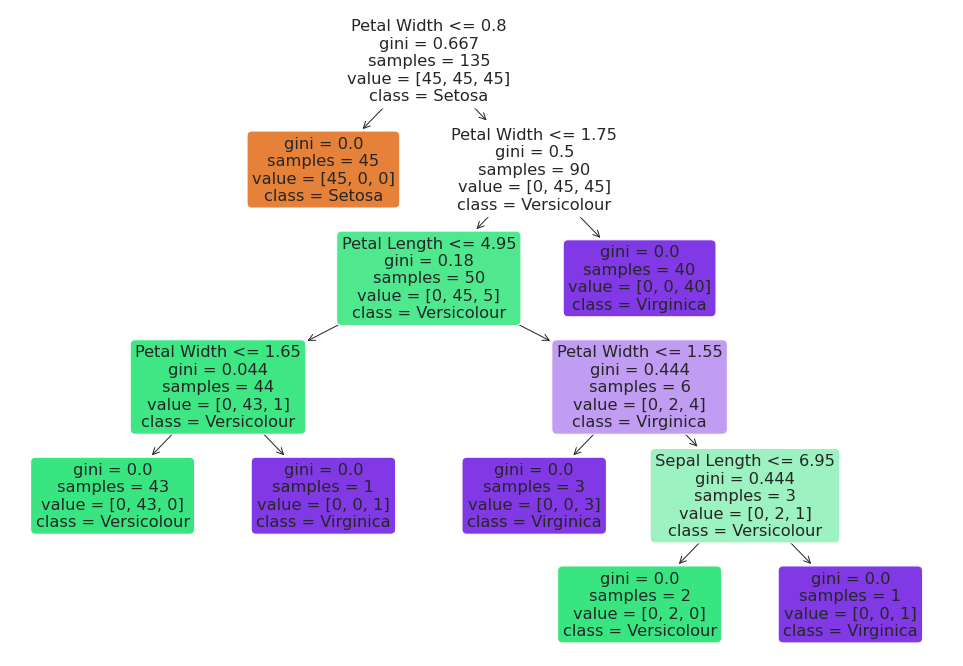

In [13]:
# Adding the feature and class names, as well
plt.figure(figsize=(17,12))
plot_tree(clf, filled=True, rounded=True, 
          feature_names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"], 
          class_names=["Setosa", "Versicolour", "Virginica"])
plt.show()

##Predicting a sample

In [12]:
# We can now give this tree an input, and it will predict the class of the flower
clf.predict([[6.1, 2.7, 3.9, 1.2]])

array([1])

## Make predictions on the test dataset

In [14]:
y_test_pred = clf.predict(x_test)
print('Shape of the y_test_pred:', y_test_pred.shape)

Shape of the y_test_pred: (15,)


## Construct the confusion matrix

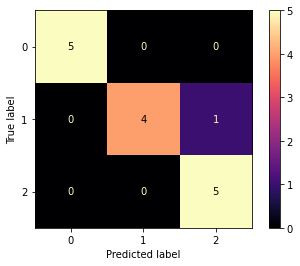

In [15]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

## classification report

In [16]:
print(classification_report(y_test, y_test_pred, target_names = ["Setosa", "Versicolour", "Virginica"]))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         5
 Versicolour       1.00      0.80      0.89         5
   Virginica       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

